# Horizon Chart with Altair

## Imports

In [1]:
from horizonChart.horizonChart import HorizonChartGenerator as hcg
from altairThemes.standardTheme import standardTheme

In [2]:
import pandas as pd
import altair as alt
import numpy as np

In [3]:
alt.themes.register("standardTheme", standardTheme)
alt.themes.enable("standardTheme")

ThemeRegistry.enable('standardTheme')

## Data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/maxthemillion/visualizingSales/master/data/sales_day.csv')
df.date = pd.to_datetime(df.date)

In [5]:
df = df.loc[(df.date>='2015-02-01') & 
            (df.date<='2015-03-31') & 
            (df.shop_id > 1) & 
            (~df.shop_id.isin([12, 9, 17, 20, 43, 10, 30, 40, 49, 50])), :]
len(df)

2269

In [6]:
grouped = df.groupby([pd.Grouper(key='shop_id'), pd.Grouper(key='date')]).sum()

In [7]:
for i in grouped.index.levels[0]:
    grouped.loc[i, 'index_base'] = grouped.loc[i,'revenue'][1]
    grouped.loc[i, 'm'] = np.median(grouped.loc[i, 'revenue'])

In [8]:
grouped['index'] = grouped.apply((lambda x: (x.revenue - x.index_base)/x.index_base), axis=1)
grouped['rel_median'] = grouped.apply((lambda x: (x.revenue - x.m)/(x.m)), axis=1)

In [9]:
grouped = grouped.reset_index()

In [10]:
grouped.head()

shop_id       date  date_block_num  item_id  item_price  item_cnt_day  \
0        2 2015-02-01            1416   464524    104474.0          66.0   
1        2 2015-02-02             225    59946     14183.0           9.0   
2        2 2015-02-03             286   113052      7357.0          13.0   
3        2 2015-02-04             459   190589     19424.0          18.0   
4        2 2015-02-05             476   171551     25271.0          20.0   

    revenue  index_base        m     index  rel_median  
0  114467.0     14183.0  28272.0  7.070718    3.048776  
1   14183.0     14183.0  28272.0  0.000000   -0.498338  
2    8705.0     14183.0  28272.0 -0.386237   -0.692098  
3   20943.0     14183.0  28272.0  0.476627   -0.259232  
4   25780.0     14183.0  28272.0  0.817669   -0.088144

## Sample plot

In [26]:
r = hcg(
    data=grouped, 
    X='date', 
    Y='rel_median',
    row='shop_id',
    noLevels=4,
    chartTitle='Deviation from average revenue over time ',
    yAxisTitle='Deviation from average revenue per store (percent)',
    xAxisTitle='Date (Feb 1st - Mar 31st 2015)',
    width=500
).generate()

In [27]:
r = r.configure_facet(spacing=4)

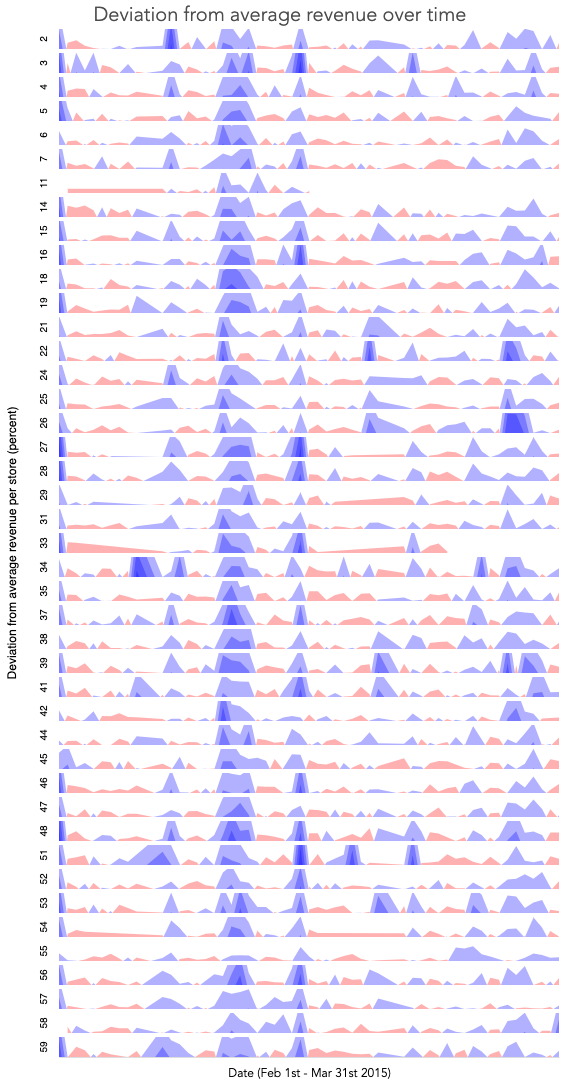

In [28]:
r

In [29]:
r.save('horizon_chart.json', embed_options={'actions': False})


### alternative example

In [14]:
bad = alt.Chart(grouped).mark_line().encode(
    alt.X('date:T', title='Date (Feb 1st - Mar 31st 2015)'),
    alt.Y('revenue:Q', 
          scale=alt.Scale(domain=(0, 800000)),
          title='Revenue'
         ),
    color=alt.Color('shop_id:O', legend=None)
).properties(
    width=500,
    height=400,
    title='Sales revenue per store'
).configure_title(
    anchor='middle'
)

In [15]:
bad.save('spaghetti1.json')

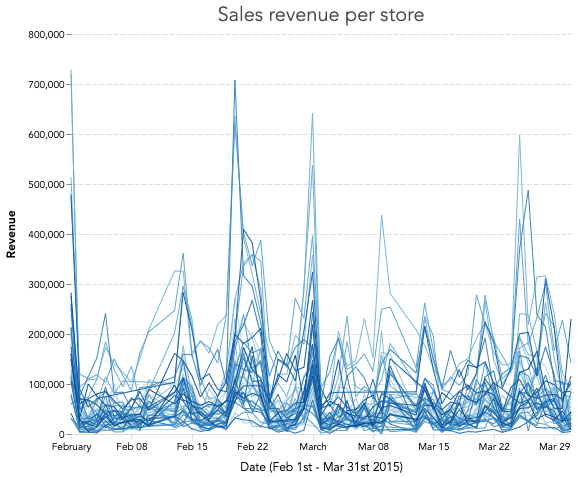

In [16]:
bad

In [17]:
bad2 = alt.Chart(grouped).mark_line().encode(
    alt.X('date:T', title='Date (Feb 1st - Mar 31st 2015)'),
    alt.Y('rel_median:Q', axis=alt.Axis(format='%'), title='Deviation from average sales per store in pct.'),
    color=alt.Color('shop_id:O', legend=None)
).properties(
    width=500,
    height=400,
    title='Deviation from average store sales over time'
).configure_title(
    anchor='middle'
)

In [18]:
bad2.save('spaghetti2.json')

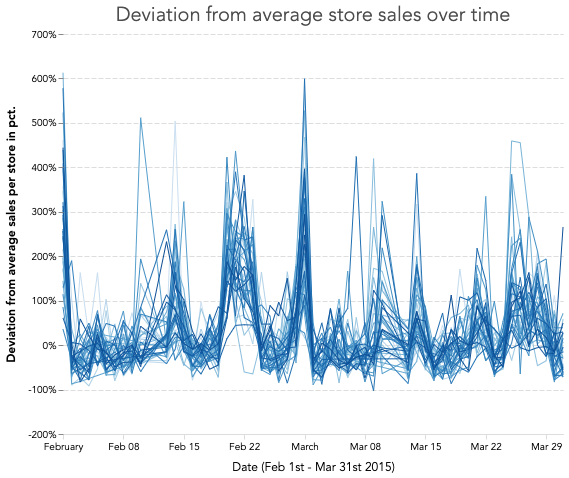

In [19]:
bad2